# Hospitality Minds Task 4 

Stastastical Analysis 

Name-Shubham Paraye

Email-Shubhamparaye5@gmail.com

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

pd.set_option("display.max_columns",30)

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

In [6]:
data=pd.read_csv('Hospitality minds dataset (3).csv')
data.head()

,Type of Hotel,Year,Month,Reservation Date,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Meal,Booking Payment,Adults,Children,Kids,Country,Booking Type,Repeated Guest,Prev Cancel,History,Reserved Room,Assigned Room,Booking Changes,Waiting List,Customer,Per Day Charges,Parking at premises,Physical Challenged,Reservation Status,Cancellation,Booking Done
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,2,0.0,0,PRT,Online TA,0,0,0,A,A,0,0,Contract,132.0,0,2,Check-Out,0,44
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,2,0.0,0,ESP,Online TA,0,0,0,A,A,1,0,Transient,150.0,1,1,Check-Out,0,27
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,1,0.0,0,FRA,Online TA,0,0,0,A,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,3,0.0,0,AUT,Online TA,0,0,0,D,D,0,0,Transient,151.0,0,4,Check-Out,0,59
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,2,0.0,0,DEU,Offline TA/TO,0,0,0,A,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313


In [7]:
data.columns=['Type_of_Hotel', 'Year', 'Month', 'Reservation_Date', 'Arrival_week',
       'Arrival_Date', 'Weekend_Stays', 'Weekday_Stays', 'Meal',
       'Booking_Payment', 'Adults', 'Children', 'Kids', 'Country',
       'Booking_Type', 'Repeated_Guest', 'Prev_Cancel', 'History',
       'Reserved_Room', 'Assigned_Room', 'Booking_Changes', 'Waiting_List',
       'Customer', 'Per_Day_Charges', 'Parking_at_premises',
       'Physical_Challenged', 'Reservation_Status', 'Cancellation',
       'Booking_Done']

In [8]:
data.head()

,Type_of_Hotel,Year,Month,Reservation_Date,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Meal,Booking_Payment,Adults,Children,Kids,Country,Booking_Type,Repeated_Guest,Prev_Cancel,History,Reserved_Room,Assigned_Room,Booking_Changes,Waiting_List,Customer,Per_Day_Charges,Parking_at_premises,Physical_Challenged,Reservation_Status,Cancellation,Booking_Done
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,2,0.0,0,PRT,Online TA,0,0,0,A,A,0,0,Contract,132.0,0,2,Check-Out,0,44
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,2,0.0,0,ESP,Online TA,0,0,0,A,A,1,0,Transient,150.0,1,1,Check-Out,0,27
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,1,0.0,0,FRA,Online TA,0,0,0,A,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,3,0.0,0,AUT,Online TA,0,0,0,D,D,0,0,Transient,151.0,0,4,Check-Out,0,59
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,2,0.0,0,DEU,Offline TA/TO,0,0,0,A,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313


In [9]:
df=data.copy()

In [10]:
df.isnull().sum()

Type_of_Hotel            0
Year                     0
Month                    0
Reservation_Date         0
Arrival_week             0
Arrival_Date             0
Weekend_Stays            0
Weekday_Stays            0
Meal                     0
Booking_Payment          0
Adults                   0
Children                 2
Kids                     0
Country                371
Booking_Type             0
Repeated_Guest           0
Prev_Cancel              0
History                  0
Reserved_Room            0
Assigned_Room            0
Booking_Changes          0
Waiting_List             0
Customer                 0
Per_Day_Charges          0
Parking_at_premises      0
Physical_Challenged      0
Reservation_Status       0
Cancellation             0
Booking_Done             0
dtype: int64

In [11]:
def perc_mv(x,y):
    perc=y.isnull().sum()/len(x)*100
    return perc

print("Missing valeu ration: \nChildres:{}\nCountry:{}".format(perc_mv(df,df['Children']),perc_mv(df,df['Country'])))

Missing valeu ration: 
Childres:0.0022222222222222222
Country:0.41222222222222227


In [12]:
df['Children']=df['Children'].fillna(0)

In [13]:
df.dtypes

Type_of_Hotel           object
Year                     int64
Month                   object
Reservation_Date        object
Arrival_week             int64
Arrival_Date             int64
Weekend_Stays            int64
Weekday_Stays            int64
Meal                    object
Booking_Payment         object
Adults                   int64
Children               float64
Kids                     int64
Country                 object
Booking_Type            object
Repeated_Guest           int64
Prev_Cancel              int64
History                  int64
Reserved_Room           object
Assigned_Room           object
Booking_Changes          int64
Waiting_List             int64
Customer                object
Per_Day_Charges        float64
Parking_at_premises      int64
Physical_Challenged      int64
Reservation_Status      object
Cancellation             int64
Booking_Done             int64
dtype: object

In [14]:
df['Type_of_Hotel']=df['Type_of_Hotel'].map({'Motel':0,'Villa':1})
df['Month']=df['Month'].map({'January':0,'February':1,'March':2,'April':3,'May':4,'June':5,'July':6,'August':7,'September':8,
                             'October':9,'November':10,'December':11})

In [15]:
def family(df):
    if((df['Adults']>0) & (df['Children']>0)):
        val =1
    elif ((df['Adults']>0) & (df['Kids']>0)):
        val=1
        
    else:
        val=0
    return val

def deposit(df):
    if((df['Booking_Payment']=='No Deposit')|(df['Booking_Payment']=='Refundable')):
        return 0
    else:
        return 1

In [16]:
def feature(df):
    df["Is_family"]=df.apply(family, axis=1)
    df['Total_customer']=df['Adults']+df['Children']+df['Kids']
    
    df['deposit_given']=df.apply(deposit,axis=1)
    df["Total_nights"]=df['Weekend_Stays']+df['Weekday_Stays']
    return df

df=feature(df)

In [17]:
df=df.drop(columns=['Adults','Children','Kids','Booking_Payment','Reservation_Date'])

In [18]:
df.head()

,Type_of_Hotel,Year,Month,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Meal,Country,Booking_Type,Repeated_Guest,Prev_Cancel,History,Reserved_Room,Assigned_Room,Booking_Changes,Waiting_List,Customer,Per_Day_Charges,Parking_at_premises,Physical_Challenged,Reservation_Status,Cancellation,Booking_Done,Is_family,Total_customer,deposit_given,Total_nights
0,0,2015,6,31,28,2,3,Bed & Breakfast,PRT,Online TA,0,0,0,A,A,0,0,Contract,132.0,0,2,Check-Out,0,44,0,2.0,0,5
1,1,2016,7,35,25,2,3,Bed & Breakfast,ESP,Online TA,0,0,0,A,A,1,0,Transient,150.0,1,1,Check-Out,0,27,0,2.0,0,5
2,1,2017,3,16,21,1,1,Bed & Breakfast,FRA,Online TA,0,0,0,A,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180,0,1.0,0,2
3,0,2016,5,27,27,2,0,Bed & Breakfast,AUT,Online TA,0,0,0,D,D,0,0,Transient,151.0,0,4,Check-Out,0,59,0,3.0,0,2
4,0,2016,7,34,20,0,2,Breakfast & Dinner,DEU,Offline TA/TO,0,0,0,A,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313,0,2.0,0,2


Correlation

In [19]:
df.columns

Index(['Type_of_Hotel', 'Year', 'Month', 'Arrival_week', 'Arrival_Date',
       'Weekend_Stays', 'Weekday_Stays', 'Meal', 'Country', 'Booking_Type',
       'Repeated_Guest', 'Prev_Cancel', 'History', 'Reserved_Room',
       'Assigned_Room', 'Booking_Changes', 'Waiting_List', 'Customer',
       'Per_Day_Charges', 'Parking_at_premises', 'Physical_Challenged',
       'Reservation_Status', 'Cancellation', 'Booking_Done', 'Is_family',
       'Total_customer', 'deposit_given', 'Total_nights'],
      dtype='object')

In [20]:
cor_data=df.copy()

In [21]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()

In [22]:
# this data is just for checking corelation not for predicting cancellation
cor_data['Meal']=le.fit_transform(cor_data['Meal'])
cor_data['Booking_Type']=le.fit_transform(cor_data['Booking_Type'])
cor_data['Reserved_Room']=le.fit_transform(cor_data['Reserved_Room'])
cor_data['Assigned_Room']=le.fit_transform(cor_data['Assigned_Room'])
cor_data['Customer']=le.fit_transform(cor_data['Customer'])
cor_data['Reservation_Status']=le.fit_transform(cor_data['Reservation_Status'])

In [23]:
cor_data.corr()

,Type_of_Hotel,Year,Month,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Meal,Booking_Type,Repeated_Guest,Prev_Cancel,History,Reserved_Room,Assigned_Room,Booking_Changes,Waiting_List,Customer,Per_Day_Charges,Parking_at_premises,Physical_Challenged,Reservation_Status,Cancellation,Booking_Done,Is_family,Total_customer,deposit_given,Total_nights
Type_of_Hotel,1.000000,-0.033400,-0.000548,0.000267,-0.002426,0.199440,0.233150,-0.140732,0.035235,0.056538,-0.032038,0.010500,0.246174,0.301156,0.082049,-0.056652,-0.024734,-0.087109,0.215674,0.046334,0.108959,-0.116331,-0.075719,0.056784,0.025080,-0.167709,0.253885
Year,-0.033400,1.000000,-0.526881,-0.543697,-0.031969,0.017253,0.040925,0.107801,0.137371,0.008258,-0.149275,0.031527,0.080912,0.024226,0.033918,-0.029101,0.012942,0.198198,-0.026974,0.103664,-0.029111,0.029818,0.062067,0.046018,0.062209,-0.055485,0.037412
Month,-0.000548,-0.526881,1.000000,0.993953,0.000522,0.016435,0.013650,-0.032415,-0.030768,-0.035511,0.056416,-0.028455,-0.010813,-0.009147,-0.000110,0.015067,-0.031124,0.077464,-0.001433,0.019180,-0.016762,0.008623,0.106786,0.015071,0.031083,0.018976,0.016781
Arrival_week,0.000267,-0.543697,0.993953,1.000000,0.086547,0.018383,0.010980,-0.035908,-0.031698,-0.034616,0.055051,-0.027951,-0.010400,-0.007968,0.000737,0.015931,-0.029459,0.071311,0.000497,0.017731,-0.013347,0.005821,0.099915,0.015450,0.028744,0.017173,0.015579
Arrival_Date,-0.002426,-0.031969,0.000522,0.086547,1.000000,0.009901,-0.012385,-0.014290,0.001588,-0.009915,-0.012265,-0.000109,0.017257,0.007879,0.007180,-0.001652,0.004260,0.019633,0.004816,0.006275,0.002366,0.001626,0.005965,0.013994,0.006310,-0.007976,-0.005230
Weekend_Stays,0.199440,0.017253,0.016435,0.018383,0.009901,1.000000,0.473036,-0.002527,0.064665,-0.070733,-0.026536,-0.041947,0.134141,0.085824,0.065323,-0.030223,-0.080291,0.043326,-0.021512,0.067142,0.013684,-0.009032,0.067996,0.048660,0.090459,-0.119551,0.754946
Weekday_Stays,0.233150,0.040925,0.013650,0.010980,-0.012385,0.473036,1.000000,-0.012637,0.051353,-0.095735,-0.027901,-0.053503,0.158429,0.095584,0.086692,-0.004477,-0.085769,0.064688,-0.040809,0.055201,-0.034164,0.037186,0.172460,0.051021,0.109624,-0.075029,0.934893
Meal,-0.140732,0.107801,-0.032415,-0.035908,-0.014290,-0.002527,-0.012637,1.000000,0.137014,-0.052573,-0.022220,-0.033542,-0.150693,-0.155800,-0.009834,-0.025155,-0.032461,0.036628,-0.041810,0.054321,0.001372,0.003015,-0.047600,-0.052836,-0.020472,-0.104580,-0.010424
Booking_Type,0.035235,0.137371,-0.030768,-0.031698,0.001588,0.064665,0.051353,0.137014,1.000000,-0.158556,-0.127961,-0.155364,0.264895,0.206445,0.044021,-0.079334,-0.199881,0.371871,0.092754,0.299309,0.112094,-0.110712,-0.212500,0.156808,0.243973,-0.351856,0.064274
Repeated_Guest,0.056538,0.008258,-0.035511,-0.034616,-0.009915,-0.070733,-0.095735,-0.052573,-0.158556,1.000000,0.137528,0.430953,-0.029792,0.020834,0.014758,-0.017281,-0.015910,-0.125436,0.071765,0.016153,0.084328,-0.085175,-0.118747,-0.034799,-0.142294,-0.054284,-0.099754


In [24]:
cor_data.corr()['Cancellation'].sort_values()

Reservation_Status    -0.917180
Physical_Challenged   -0.222243
Parking_at_premises   -0.201436
Assigned_Room         -0.161651
Booking_Changes       -0.121808
Type_of_Hotel         -0.116331
Booking_Type          -0.110712
Repeated_Guest        -0.085175
Reserved_Room         -0.056925
History               -0.055343
Customer              -0.044837
Is_family             -0.015605
Weekend_Stays         -0.009032
Arrival_Date           0.001626
Meal                   0.003015
Arrival_week           0.005821
Month                  0.008623
Total_nights           0.024040
Per_Day_Charges        0.026610
Year                   0.029818
Weekday_Stays          0.037186
Waiting_List           0.056811
Total_customer         0.058561
Prev_Cancel            0.127061
Booking_Done           0.298306
deposit_given          0.427766
Cancellation           1.000000
Name: Cancellation, dtype: float64

As we can see in the sorted list, reservation_status seems to be most impactful feature. With that information accuracy rate should be really high. It can be better to drop reservation_status column to see how other features can predict. I am going to try both.

Impacts of three feature that are created:

deposit_given = 0,427766

is_family = -0,015605

total_customer = 0,058561

In [25]:
# It is highly correlated to total_nights and also there is no much difference impact, so I will not use total_nights.
# Week nights have higher impact.
cor_data.corr()['Weekday_Stays']

Type_of_Hotel          0.233150
Year                   0.040925
Month                  0.013650
Arrival_week           0.010980
Arrival_Date          -0.012385
Weekend_Stays          0.473036
Weekday_Stays          1.000000
Meal                  -0.012637
Booking_Type           0.051353
Repeated_Guest        -0.095735
Prev_Cancel           -0.027901
History               -0.053503
Reserved_Room          0.158429
Assigned_Room          0.095584
Booking_Changes        0.086692
Waiting_List          -0.004477
Customer              -0.085769
Per_Day_Charges        0.064688
Parking_at_premises   -0.040809
Physical_Challenged    0.055201
Reservation_Status    -0.034164
Cancellation           0.037186
Booking_Done           0.172460
Is_family              0.051021
Total_customer         0.109624
deposit_given         -0.075029
Total_nights           0.934893
Name: Weekday_Stays, dtype: float64

In [26]:
cor_data=cor_data.drop(columns=['Total_nights','Arrival_week','Month','Weekend_Stays'],axis=1)

In [27]:
indices = cor_data.loc[pd.isna(cor_data["Country"]), :].index 
cor_data = cor_data.drop(cor_data.index[indices])   
cor_data.isnull().sum()

cor_data.isnull().sum()

Type_of_Hotel          0
Year                   0
Arrival_Date           0
Weekday_Stays          0
Meal                   0
Country                0
Booking_Type           0
Repeated_Guest         0
Prev_Cancel            0
History                0
Reserved_Room          0
Assigned_Room          0
Booking_Changes        0
Waiting_List           0
Customer               0
Per_Day_Charges        0
Parking_at_premises    0
Physical_Challenged    0
Reservation_Status     0
Cancellation           0
Booking_Done           0
Is_family              0
Total_customer         0
deposit_given          0
dtype: int64

Since we have decided what to do with features and missing values, we can work on first data.

In [28]:
indices = df.loc[pd.isna(df["Country"]), :].index 
df = df.drop(df.index[indices])
df=df.drop(columns=['Arrival_week','Month','Weekend_Stays'],axis=1)

In [29]:
df.columns

Index(['Type_of_Hotel', 'Year', 'Arrival_Date', 'Weekday_Stays', 'Meal',
       'Country', 'Booking_Type', 'Repeated_Guest', 'Prev_Cancel', 'History',
       'Reserved_Room', 'Assigned_Room', 'Booking_Changes', 'Waiting_List',
       'Customer', 'Per_Day_Charges', 'Parking_at_premises',
       'Physical_Challenged', 'Reservation_Status', 'Cancellation',
       'Booking_Done', 'Is_family', 'Total_customer', 'deposit_given',
       'Total_nights'],
      dtype='object')

In [30]:
df.head()

,Type_of_Hotel,Year,Arrival_Date,Weekday_Stays,Meal,Country,Booking_Type,Repeated_Guest,Prev_Cancel,History,Reserved_Room,Assigned_Room,Booking_Changes,Waiting_List,Customer,Per_Day_Charges,Parking_at_premises,Physical_Challenged,Reservation_Status,Cancellation,Booking_Done,Is_family,Total_customer,deposit_given,Total_nights
0,0,2015,28,3,Bed & Breakfast,PRT,Online TA,0,0,0,A,A,0,0,Contract,132.0,0,2,Check-Out,0,44,0,2.0,0,5
1,1,2016,25,3,Bed & Breakfast,ESP,Online TA,0,0,0,A,A,1,0,Transient,150.0,1,1,Check-Out,0,27,0,2.0,0,5
2,1,2017,21,1,Bed & Breakfast,FRA,Online TA,0,0,0,A,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180,0,1.0,0,2
3,0,2016,27,0,Bed & Breakfast,AUT,Online TA,0,0,0,D,D,0,0,Transient,151.0,0,4,Check-Out,0,59,0,3.0,0,2
4,0,2016,20,2,Breakfast & Dinner,DEU,Offline TA/TO,0,0,0,A,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313,0,2.0,0,2


In [31]:
df1=df.copy()

In [32]:
df1= pd.get_dummies(data = df1, columns =['Meal','Booking_Type','Reserved_Room','Assigned_Room','Customer','Reservation_Status'])

In [33]:
df1['Country']=le.fit_transform(df1['Country'])

# Decision Tree Model (reservation_status included)

In [42]:
x=df1.drop(['Cancellation'],axis=1)
y=df1['Cancellation']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [43]:
cart=DecisionTreeClassifier(max_depth=12)


In [44]:
cart_model=cart.fit(x_train,y_train)

In [45]:
y_pred = cart_model.predict(x_test)

In [46]:
print("DecisionTreeModel")

print('Accuracy Score: {}\n\nConfusionMatrix:\n{}\n\nAUC Score:{}'.format(accuracy_score(y_test,y_pred),confusion_matrix(y_test,y_pred),roc_auc_score(y_test,y_pred)))

DecisionTreeModel
Accuracy Score: 0.9997024805682622

ConfusionMatrix:
[[16910     2]
 [    6  9971]]

AUC Score:0.9996401787972318


Text(0.5, 0, 'Feature Importances (%)')

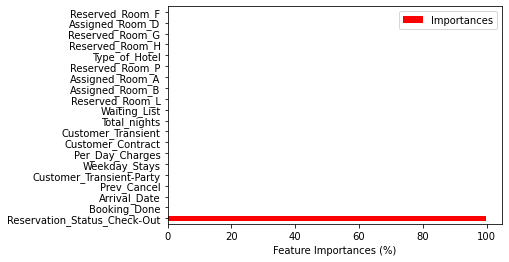

In [47]:
pd.DataFrame(data=cart_model.feature_importances_*100,
            columns=['Importances'],
            index=x_train.columns).sort_values('Importances',ascending=False)[:20].plot(kind='barh',color='r')

plt.xlabel("Feature Importances (%)")

In the correlation part, we have seen the impact of reservation status. Reservation status dominates other features totally. By keeping reservation_status in data, it is possible to achieve 100% accuracy rate because that feature is direct way to predict cancellations, its like cheating. For the sake of analysis I will drop reservation_status and continue analysis without it.

In [48]:
df2=df1.drop(columns=['Reservation_Status_Canceled','Reservation_Status_Check-Out','Reservation_Status_No-Show'],axis=1)

In [49]:
y = df2['Cancellation']
X = df2.drop(["Cancellation"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [50]:
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

# Model and ROC Curve Comparison

Logistic Regression Model

In [51]:
print('Model: Logistic Regression\n')
model(LogisticRegression(solver = "liblinear"), X_train, X_test, y_train, y_test)

Model: Logistic Regression

Accuracy Score: 0.7780133139945703

Confusion Matrix:
 [[15172  1740]
 [ 4229  5748]]


In [52]:
LogR = LogisticRegression(solver = "liblinear")
cv_scores = cross_val_score(LogR, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7780741730942231


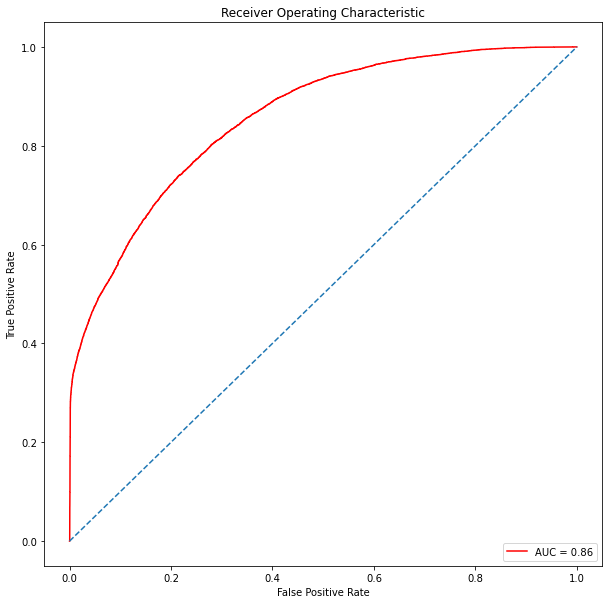

In [53]:
ROC(y_test, y_prob)

# Gaussian Naive Bayes Model

In [54]:
print('Model: Gaussian Naive Bayes\n')
model(GaussianNB(), X_train, X_test, y_train, y_test)

Model: Gaussian Naive Bayes

Accuracy Score: 0.5278366618319759

Confusion Matrix:
 [[ 5175 11737]
 [  959  9018]]


In [55]:
NB = GaussianNB()
cv_scores = cross_val_score(NB, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.538743091929812


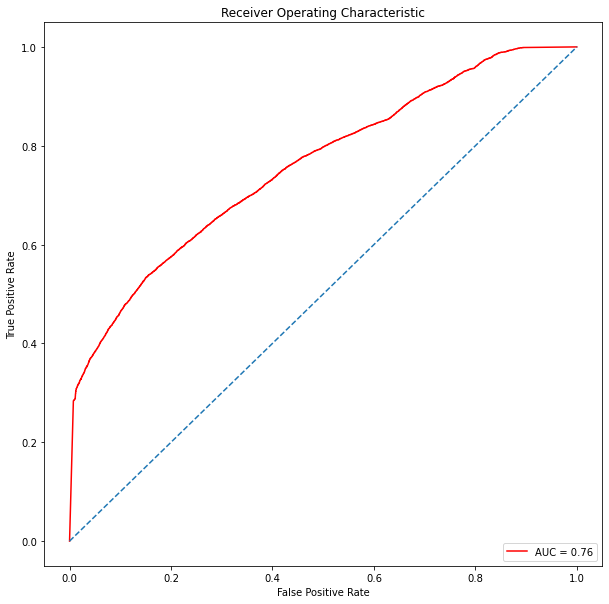

In [56]:
ROC(y_test, y_prob)

# Support Vector Classification Model

In [ ]:
#print('Model: SVC\n')
def model1(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_pred
    y_pred = alg_model.predict(X_test)
    
    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    
model1(SVC(kernel = 'linear'), X_train, X_test, y_train, y_test)

# Decision Tree Model (reservation_status excluded)

In [57]:
print('Model: Decision Tree\n')
model(DecisionTreeClassifier(max_depth = 12), X_train, X_test, y_train, y_test)

Model: Decision Tree

Accuracy Score: 0.8194057049351036

Confusion Matrix:
 [[14992  1920]
 [ 2936  7041]]


In [58]:
DTC = DecisionTreeClassifier(max_depth = 12)
cv_scores = cross_val_score(DTC, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.8161643687780245


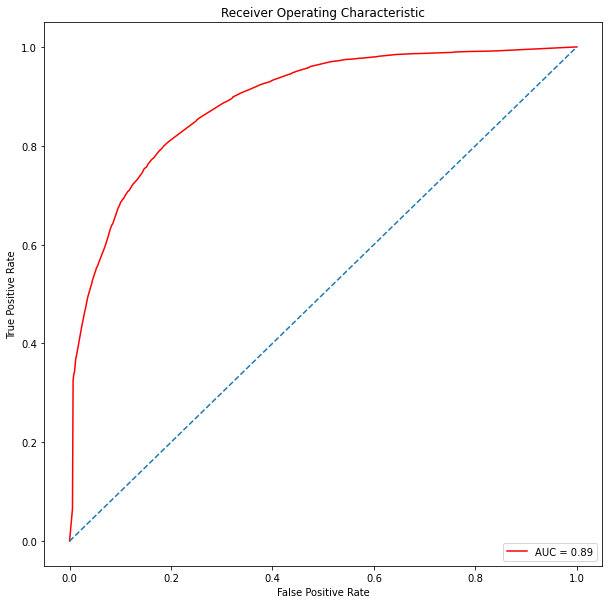

In [59]:
ROC(y_test, y_prob)

# Random Forest

In [60]:
print('Model: Random Forest\n')
model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Model: Random Forest

Accuracy Score: 0.8312692922756517

Confusion Matrix:
 [[15260  1652]
 [ 2885  7092]]


In [61]:
RFC = RandomForestClassifier()
cv_scores = cross_val_score(RFC, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.8281917705826297


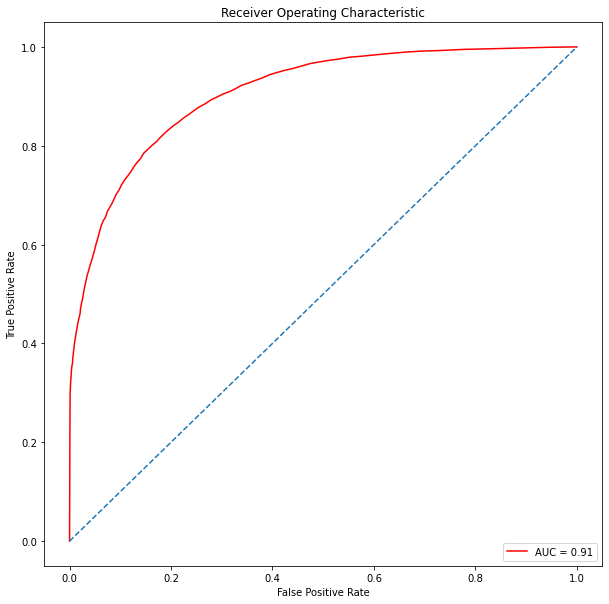

In [62]:
ROC(y_test, y_prob)

# Random Forest Model Tuning

In [ ]:
rf_parameters = {"max_depth": [10,13],
                 "n_estimators": [10,100,500],
                 "min_samples_split": [2,5]}

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_cv_model = GridSearchCV(rf_model,
                           rf_parameters,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(X_train, y_train)

In [ ]:
print('Best parameters: ' + str(rf_cv_model.best_params_))

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 13,
                                  min_samples_split = 2,
                                  n_estimators = 500)

print('Model: Random Forest Tuned\n')
model(rf_tuned, X_train, X_test, y_train, y_test)

# XGBoost Model

In [ ]:
print('Model: XGBoost\n')
model(XGBClassifier(), X_train, X_test, y_train, y_test)

In [ ]:
XGB = XGBClassifier()
cv_scores = cross_val_score(XGB, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

In [ ]:
ROC(y_test, y_prob)

# Conclusion

Feature Importances

Text(0.5, 0, 'Feature Importances (%)')

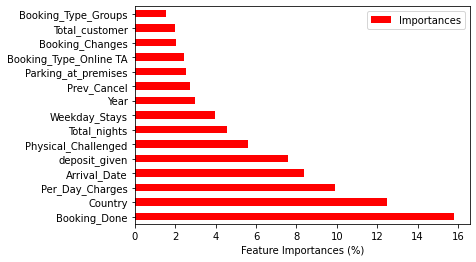

In [63]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(X_train, y_train)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

# Summary Table of the Models

In [65]:
table = pd.DataFrame({"Model": ["Decision Tree (reservation status included)", "Logistic Regression",
                                "Naive Bayes", "Support Vector", "Decision Tree", "Random Forest",
                                "Random Forest Tuned", "XGBoost"],
                      "Accuracy Scores": ["0.999", "0.778", "0.528", "0.759", "0.819",
                                         "0.831", "0.815", "0.826"],
                      "ROC | Auc": ["99", "0.86", "0.76", "0",
                                   "0.89", "0.91", "0", "0.91"]})


table["Model"] = table["Model"].astype("category")
table["Accuracy Scores"] = table["Accuracy Scores"].astype("float32")
table["ROC | Auc"] = table["ROC | Auc"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)


,Accuracy Scores,ROC | Auc
Model,,
Decision Tree (reservation status included),0.999,99.00
Random Forest,0.831,0.91
XGBoost,0.826,0.91
Decision Tree,0.819,0.89
Random Forest Tuned,0.815,0.00
Logistic Regression,0.778,0.86
Support Vector,0.759,0.00
Naive Bayes,0.528,0.76


 As we can see from the summary table, the best algorithm is random forest for this data set.
0 values are uncalculated ones.

We do not count decision tree with reservatiton status which is broken. All algorithms would give 100% accuracy scores while reservation status is included.

Tuning for XGBoost would be a good challenge too.